#                            Project = Fake News Detection using Machine Learning
                                
 #                            Team Members = Abhya,Divyansh,Pranav,Tarun,Anuj
#                                           Course Code = CAB113

# Import all the Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


# Import True & Fake csv File

In [7]:
true_news = pd.read_csv(r"C:\Users\ABHYA JAMWAL\Downloads\True.csv")
fake_news = pd.read_csv(r"C:\Users\ABHYA JAMWAL\Downloads\Fake (1).csv")

In [11]:
true_news.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [10]:
fake_news.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


# Checking rows & columns of both csv file

In [12]:
print("True News Shape:", true_news.shape)
print("Fake News Shape:", fake_news.shape)

True News Shape: (21417, 4)
Fake News Shape: (23481, 4)


#  Labeling Real and Fake News in the Dataset

In [13]:
true_news['label'] = 1  # Real News = 1
fake_news['label'] = 0  # Fake News = 0

# Combining Real and Fake News Data


In [14]:
data = pd.concat([true_news, fake_news], axis=0).reset_index(drop=True)
print("\nCombined Data Shape:", data.shape)



Combined Data Shape: (44898, 5)


# checking missing values 

In [41]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [15]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


#  Exploring the Dataset: Info and Missing Values

In [16]:
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

Missing Values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64


#  Visualizing the Distribution of Fake and Real News

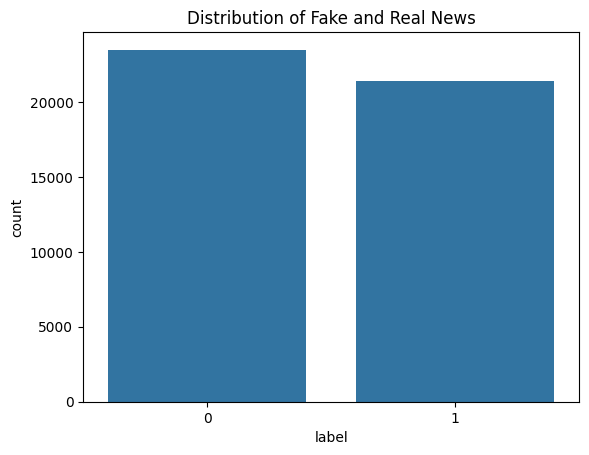

In [17]:
sns.countplot(x='label', data=data)
plt.title('Distribution of Fake and Real News')
plt.show()

# Text Preprocessing: Cleaning the Text

In [18]:
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Combining Title and Text, and Cleaning the Data

In [19]:
data['text'] = data['title'] + " " + data['text']  # Combine title and text
data['text'] = data['text'].apply(clean_text)


# Preparing Features and Labels for Model Training

In [21]:
X = data['text']
y = data['label']

# Splitting the Dataset into Training and Testing Sets


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Checking the Size of Training and Testing Sets

In [23]:
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (35918,)
Testing set size: (8980,)


#  Text Vectorization using TF-IDF


In [24]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [25]:
model = LogisticRegression()

# Training the Logistic Regression Model

In [26]:
model.fit(X_train_tfidf, y_train)

LogisticRegression()

# Making Predictions with the Trained Model


In [27]:
y_pred = model.predict(X_test_tfidf)

# Evaluating the Model’s Performance

In [28]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.9881959910913141

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Visualizing the Model’s Performance: Confusion Matrix


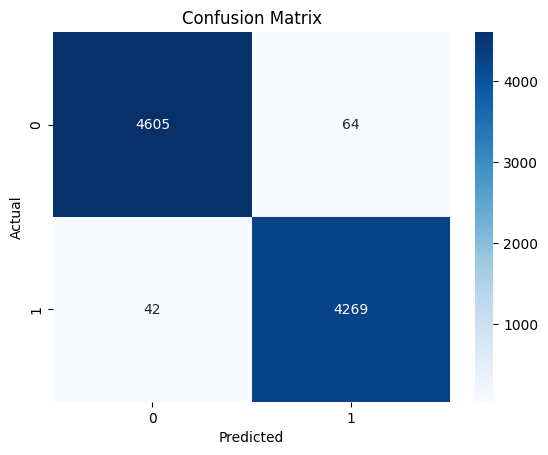

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving the Trained Model and Vectorizer

In [30]:
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [42]:
print("\nModel and Vectorizer saved!")


Model and Vectorizer saved!


# Predicting News Title: Real or Fake

In [68]:
def predict_news_title(title):
    try:
        # Clean the input title
        cleaned_title = clean_text(title)
        
        # Vectorize the title
        title_tfidf = vectorizer.transform([cleaned_title])
        
        # Predict whether it's real or fake
        prediction = model.predict(title_tfidf)
        
        # Output result
        if prediction == 1:
            return "The news is REAL."
        else:
            return "The news is FAKE."
    except Exception as e:
        return f"Error during prediction: {e}"

# Predicting Random News Title from DataFrame

In [72]:
# Get a random title from your dataframe (assumed `data` is already created from your CSV)
random_title_from_csv = data['title'].sample(1).values[0]

# Predict the random title
result = predict_news_title(random_title_from_csv)
print(f"Title: {'U.S. military to accept transgender recruits on Monday: Pentagon'}")
print(result)


Title: U.S. military to accept transgender recruits on Monday: Pentagon
The news is REAL.
